<a href="https://colab.research.google.com/github/kohyarp/DATA606-LAB1/blob/main/hw1_programming_Koohyar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Homework #1, by Koohyar Pooladvand
#For ML course
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
import pprint

In [3]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)
#### Use the following line before plt.plot(....) to increase the plot size ####
# plt.figure(figsize=FIGSIZE)
cv=KFold(n_splits = 10,random_state = RANDOM_STATE,shuffle = True)

## Question 1
Use the breast cancer data set from Homework 0 to create a training set. Recall that the
label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. Compute the
base rate of malignant cancer occurrence over the entire data set. In other words, what would
be your best guess for the probability of malignant cancer of a single example using only the
labels in the training set? This question is very simple, so try not to overthink it.

In [4]:
from sklearn import datasets
cancer = datasets.load_breast_cancer() #laod the data
df = pd.DataFrame(cancer.data, columns=cancer.feature_names) # define df using panda's dataframe and cancer.data
df['label'] = pd.DataFrame(cancer.target) #assign cancer.target to label in df
#df.head(10)
num_rows, num_columns = df.shape
print(f'Number of columns: {num_columns} and number of patients: {num_rows}')

#cancer_base_probability =  round((num_columns-sum(df['label']))/num_rows,4)*100 # number of malignant case over the total cases
cancer_base_probability =  round(sum(df['label']==0)/num_rows,4)*100 # number of malignant case over the total cases

print(f'The best guess for the probability of malignant cancer is {cancer_base_probability} percent')



Number of columns: 31 and number of patients: 569
The best guess for the probability of malignant cancer is 37.26 percent


## 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, one can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
In this question you will need to complete two sub-components:
### (a)
(a) Make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as you
search for an optimal `max_depth` parameter. Vary the depth of your decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

Plot the results of both evaluation procedures on the same plot with evaluation scores on
the y-axis and max depth values on the x-axis. Use 10 as your random seed/state for the
decision tree and the cross-validation. Use a legend to label both evaluation procedures.


### (b)
Answer the questions below based on the results of 2a. Write your answers in the
corresponding field in the markdown cell that is present in the HW1 template notebook.
Do this by double clicking the markdown cell and writing your answer directly in the
cell. Pressing enter will re-render the markdown.

#### (i.)
What setting of `max_depth` gave the best accuracy w.r.t. the **full-dataset** accuracy?
If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:**

#### (ii.)
What setting of `max_depth`  gave the best accuracy w.r.t. the **cross-
validated** accuracy? If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:**



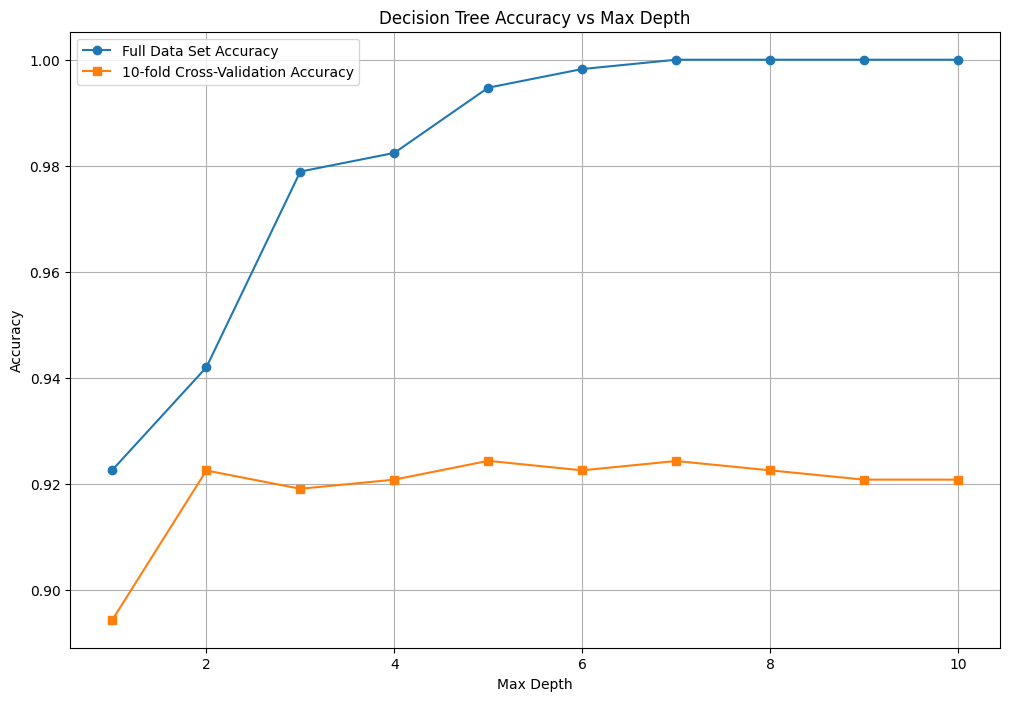

In [10]:
# (a) a plot that visualizes the perfromance of a decision tree cassifier
# we will be using 10-fold cross validation and chagingthe depth from 1 to 10
#while ploting the error to assess the process.
# two ways they awill be verified one for full dataset and second for cross-validation
#Data is already loaded in above cells

#Import train_test_split
from sklearn.model_selection import train_test_split

# starts with the empty vector for the accuracies
full_dataset_accuracies = []
cross_validated_accuracies = []

# define max depth of 10
max_depths = range(1,11)

# using the df defined above, I need to split it again for feature and label for
#easy use below
# Split the features (X) and label (y)
x = df.drop(columns='label')  # all Features except label column
y = df['label']               # Target labels (0 for malignant, 1 for benign)

# now run over the range of depth from 1 to 10 and calcualte the accuracies
# for both cases
for depth in max_depths:
    #let's define the classifier using the depth and the RANDOM_STATE
    clf = tree.DecisionTreeClassifier(max_depth = depth, random_state = RANDOM_STATE)

    # as recommended I used the 30/70 split for the full dataset accuracy just
    # for fun to test too
    # define the tarin and test set below
#    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,
#                                                        random_state=RANDOM_STATE)

    #run traiing model
#    clf.fit(X_train, y_train)
    clf.fit(x, y)


#    accuracy_full_dataset = clf.score(X_test, y_test)
    accuracy_full_dataset = clf.score(x, y)

    full_dataset_accuracies.append(accuracy_full_dataset)

    #use 10-fold to run cross-validation and calcualte the accuracy
    scores = cross_val_score(clf, x, y, cv=cv, scoring='accuracy')
    accuracy_cross_validated = scores.mean()
    cross_validated_accuracies.append(accuracy_cross_validated)

#result is cacualted in above for loop, now let's plot them
plt.figure(figsize=FIGSIZE)
plt.plot(max_depths, full_dataset_accuracies, label='Full Data Set Accuracy', marker='o')
plt.plot(max_depths, cross_validated_accuracies, label='10-fold Cross-Validation Accuracy', marker='s')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()




question (i) : Upon reviewing the accuracy across different depths, the accuracy increases as the depth increases, with the model reaching 100% accuracy starting from a max depth of 7. While this seems ideal, it may indicate overfitting, as the model could be fitting the training data too closely, potentially reducing its ability to generalize to new data. Moreover, increasing the depth further adds computational complexity. Therefore, although a just forth sake of accuracy max depth of 7 gives the mot optimum result; however, on the full dataset, caution is needed as this could lead to overfitting.

Question (ii): In the 10-fold cross-validation analysis, the accuracy quickly reaches around 92% at a max depth of 2. Beyond this depth, the accuracy remains stable, showing no significant improvement with increased depth. This suggests that adding more layers does not enhance the model’s generalization and might be unnecessary. Moreover, the fact that the accuracy plateaus at a depth of 2 indicates that increasing the depth further could risk overfitting on the full dataset, as seen in the full-dataset accuracy. Thus, a max depth of 2 provides the best balance between performance and model complexity in this cross-validation scenario.

As I ran a case of 30/70 split, one also can see clearly 2 dpeth is a more relaible option here and goign above not significatly improve genral accuracy.

## 3\.
This question explores random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.
You will make two plots and answer questions about them.

### (a)
For the first plot, use a `ensemble.RandomForestClassifier` and the best depth you
found 2(b)ii as `max_depth`. We will now find the optimal setting of a second parameter,
n estimators. Vary the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
use 10 as your random seed for your classifier and cross-validation.

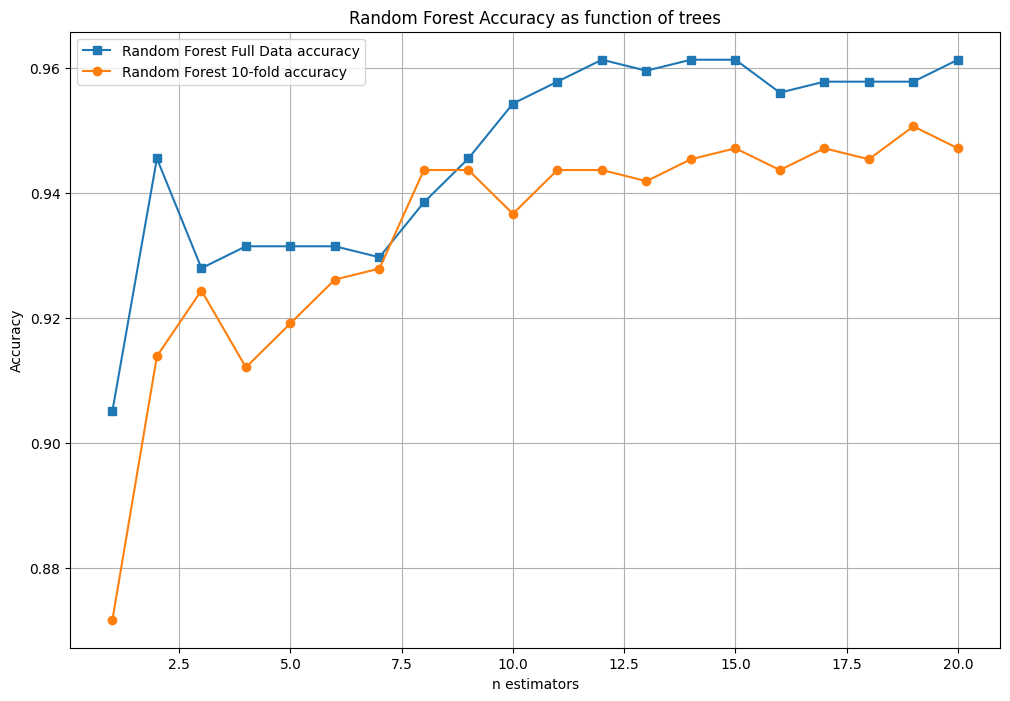

In [14]:
from sklearn.ensemble import RandomForestClassifier

max_depth = 2 # as found in 2(b)
# starts with the empty vector for the accuracies
rf_xval_accuracies = []
rf_fullval_accuracies = []

# features and labels are defined above as x and y

n_estimators_range = range(1,21)
for n_estimators in n_estimators_range:
    # Initialize RandomForestClassifier with current n_estimators and best max_depth
    rf_clf = RandomForestClassifier(n_estimators=n_estimators,
                                    max_depth=max_depth,
                                    random_state=RANDOM_STATE)
    # Fit the model to the data
    rf_clf.fit(x, y) #This will train the model on the provided data

    accuracy_full_dataset = rf_clf.score(x, y)
    rf_fullval_accuracies.append(accuracy_full_dataset)

    # Perform 10-fold cross-validation and calculate accuracy
    scores = cross_val_score(rf_clf, x, y, cv=cv, scoring='accuracy')
    rf_xval_accuracies.append(scores.mean())

#result is cacualted in above for loop, now let's plot them
plt.figure(figsize=FIGSIZE)
plt.plot(n_estimators_range, rf_fullval_accuracies, label='Random Forest Full Data accuracy', marker='s')
plt.plot(n_estimators_range, rf_xval_accuracies, label='Random Forest 10-fold accuracy', marker='o')
plt.xlabel('n estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy as function of trees')
plt.legend()
plt.grid(True)
plt.show()


### (b)
Do you see an improvement using random forests versus using a single tree? (Note: use
the `n_estimators`=1 result as the result for a single tree.)

**Student answer here:**
Yes, there is a noticeable improvement in accuracy when using random forests compared to a single decision tree. With `n_estimators`=1, which represents a single tree, the accuracy starts around 87%. However, when increasing the number of trees, the accuracy imporoves. The most noticeable improvement happens early on, particularly when increasing from `n_estimators`=1 to `n_estimators`=2, where accuracy jumps from ~87% to ~91%, representing the highest single increase. As the number of trees grows, the accuracy continues to improve, but the rate of improvement diminishes after about 8 trees, where it begins to plateau. Beyond this point, adding more trees results in marginal gains, indicating that while random forests outperform single trees, the benefits of additional trees decrease after a certain number.  

### (c)
What setting of `n_estimators` gave the best accuracy w.r.t. the cross-validated ac-
curacy?

**Student answer here:**
For the 10-fold, 19 gives the best accuracy; however gain after 8 is not signifcant. All in all, one may argue in favor of 8 to be the best.
For the full data set, 11 seems to be giving the best results.  Comparing full with x-validation one can argue 2 is the best all in all for lowes computationa lwork and 11 for the best computation and accuracy. for the section d I chose `n_estimators`=11.


### (d)
For the second plot, again use a `ensemble.RandomForestClassifier`, but this time
you will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. Use your answer to 3c as the setting for `n_estimators` and follow the
procedure from 2a to find the best setting for max depth. This time, only plot the results
from cross-validation and not the full set, but the plot should be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10). Again, use 10 as your random seed.

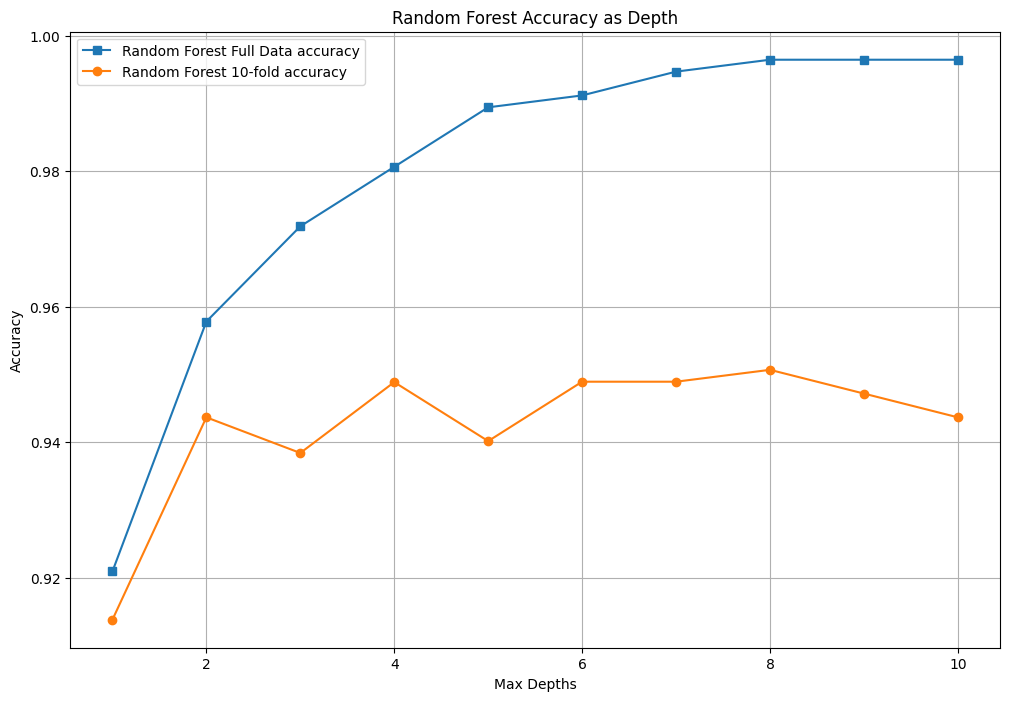

In [16]:
# starts with the empty vector for the accuracies
rf_xval_accuracies_d = []
rf_fullval_accuracies_d = []

# features and labels are defined above as x and y
# define best n_estimator
n_estimators = 11

for depth in max_depths:
    # Initialize RandomForestClassifier with current n_estimators and best max_depth
    rf_clf = RandomForestClassifier(n_estimators=n_estimators,
                                    max_depth=depth,
                                    random_state=RANDOM_STATE)
    # Fit the model to the data
    rf_clf.fit(x, y) #This will train the model on the provided data

    accuracy_full_dataset = rf_clf.score(x, y)
    rf_fullval_accuracies_d.append(accuracy_full_dataset)

    # Perform 10-fold cross-validation and calculate accuracy
    scores = cross_val_score(rf_clf, x, y, cv=cv, scoring='accuracy')
    rf_xval_accuracies_d.append(scores.mean())

#result is cacualted in above for loop, now let's plot them
plt.figure(figsize=FIGSIZE)
plt.plot(max_depths, rf_fullval_accuracies_d, label='Random Forest Full Data accuracy', marker='s')
plt.plot(max_depths, rf_xval_accuracies_d, label='Random Forest 10-fold accuracy', marker='o')
plt.xlabel('Max Depths')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy as Depth')
plt.legend()
plt.grid(True)
plt.show()

### (e)
In the plot in 3d, is the optimal setting of `max_depth` the same as in 2(b)ii? If not, what
is the new optimal setting of `max_depth`?

**Student answer here:**
The optimal setting of max_depth in 3d is similar to the setting found in 2(b)ii. In both cases, a `max_depth` of 2 provides the most significant gain in accuracy, particularly when considering cross-validated performance. While increasing the depth beyond 2 results in a steady but marginal improvement up to a depth of 8, the benefits are minimal when considering the added computational cost. for the 1-fold, beyond a depth of 2, the accuracy improvements fluctuate within a small range (around 1%), suggesting potential overfitting without meaningful accuracy gains. Therefore, based on the 10-fold cross-validation and computational efficiency, max_depth=2 remains the optimal setting, as further increases in depth do not provide a significant return.

## 4\.
For this last question, we will explore the dependability of our estimates.
### (a)
Make a plot using the following procedure:
#### i.
Using random state values from 0, 1, · · · , 99 calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
As before, you should use the same random state value for your classifier and cross-validation.
#### ii.
Then record the best max depth settings for each random state. Be sure to check whether multiple settings
achieve the best accuracy.


Plot the counts for the best max depth settings as a bar chart with the max depth settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting).

*Note*: this calculation might take some time. For debugging, try a smaller range of
random states.

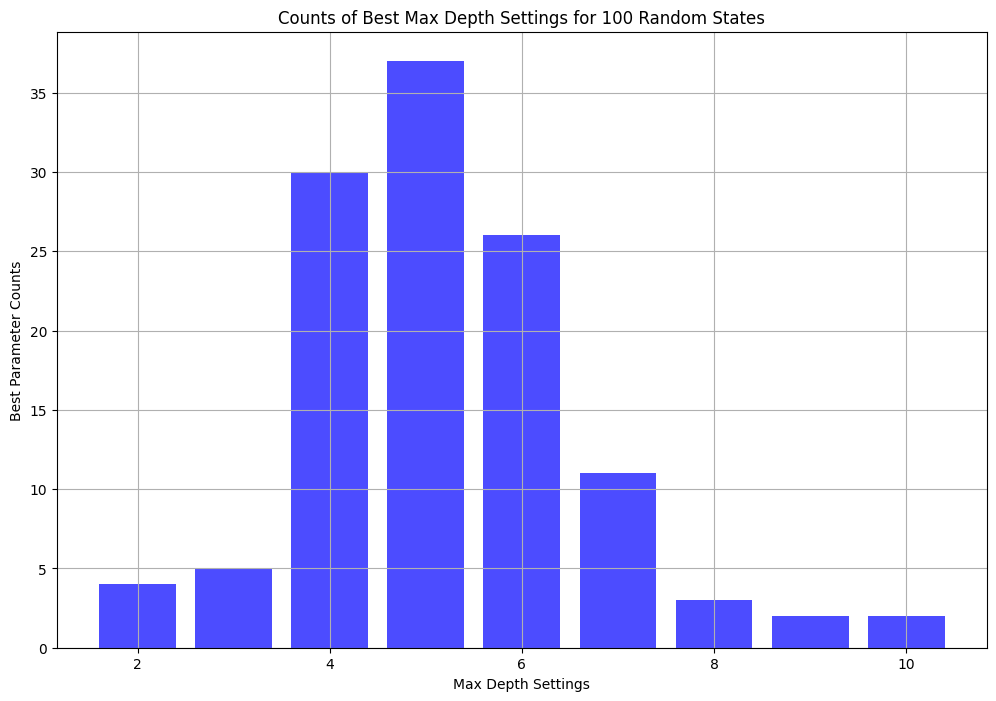

In [18]:
#define random states
RANDOM_STATES = range(100)
#RANDOM_STATES = [1,10, 65]

# starts with the empty vector for the best results
best_depth_counts = defaultdict(int)

for RANDOM_STATE in RANDOM_STATES:
  max_score_depth = []
  for depth in max_depths:
        #let's define the classifier using the depth and the RANDOM_STATE
        clf = tree.DecisionTreeClassifier(max_depth = depth, random_state = RANDOM_STATE)
        cv=KFold(n_splits = 10,random_state = RANDOM_STATE,shuffle = True)
        scores = cross_val_score(clf, x, y, cv=cv, scoring='accuracy')
        accuracy_cross_validated = scores.mean()
        max_score_depth.append(accuracy_cross_validated)

  # find the best score in depth and the depth itself
  max_score = max(max_score_depth)
  max_score_index = max_score_depth.index(max_score)
#  best_depth = max_depths[max_score_index]
  # Find the best score and corresponding depth
  max_score = max(max_score_depth)
  best_depths = [depth for depth, score in zip(max_depths, max_score_depth) if score == max_score]
  # Count each best depth
  for best_depth in best_depths:
      best_depth_counts[best_depth] += 1

# Plot the results
plt.figure(figsize=(12, 8))
plt.bar(best_depth_counts.keys(), best_depth_counts.values(), color='blue', alpha=0.7)
plt.xlabel('Max Depth Settings')
plt.ylabel('Best Parameter Counts')
plt.title('Counts of Best Max Depth Settings for 100 Random States')
plt.grid(True)
plt.show()

### (b)
What are the top two most frequent parameter settings?

**Student answer here:**
the top two are 5 and 4 for the depth.